In [2]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,SimpleRNN,BatchNormalization,GRU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler


In [3]:
stock_name = "AAPL"

df = yf.download(stock_name, period="2y", interval="1h")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2023-01-03 14:30:00+00:00,125.459999,130.899994,125.230003,130.279999,27775505
2023-01-03 15:30:00+00:00,125.345001,125.870003,124.730003,125.459999,18104999
2023-01-03 16:30:00+00:00,124.660004,125.370003,124.349098,125.350197,11248777
2023-01-03 17:30:00+00:00,124.649902,124.940002,124.190002,124.660004,8860080
2023-01-03 18:30:00+00:00,124.570000,125.000000,124.190002,124.669899,8388062
...,...,...,...,...,...
2025-01-02 16:30:00+00:00,243.428604,245.250000,243.320007,244.909897,4384552
2025-01-02 17:30:00+00:00,242.686203,243.410004,242.309998,243.410004,6464462


[*********************100%***********************]  1 of 1 completed
c:\Users\Acer\Desktop\projects\autoTrade\test\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0302 - val_loss: 4.7120e-04
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7330e-04 - val_loss: 0.0015
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7270e-04 - val_loss: 2.4258e-04
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8753e-04 - val_loss: 2.0729e-04
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6264e-04 - val_loss: 0.0014
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2785e-04 - val_loss: 0.0015
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1161e-04 - val_loss: 0.0018
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1489e-04 - val_loss: 0.0015
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5160e-04 - val_loss: 5.5561e-04
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1218e-04 - val_loss: 2.5107e-04
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3261e-04 - val_loss: 1.6197e-04

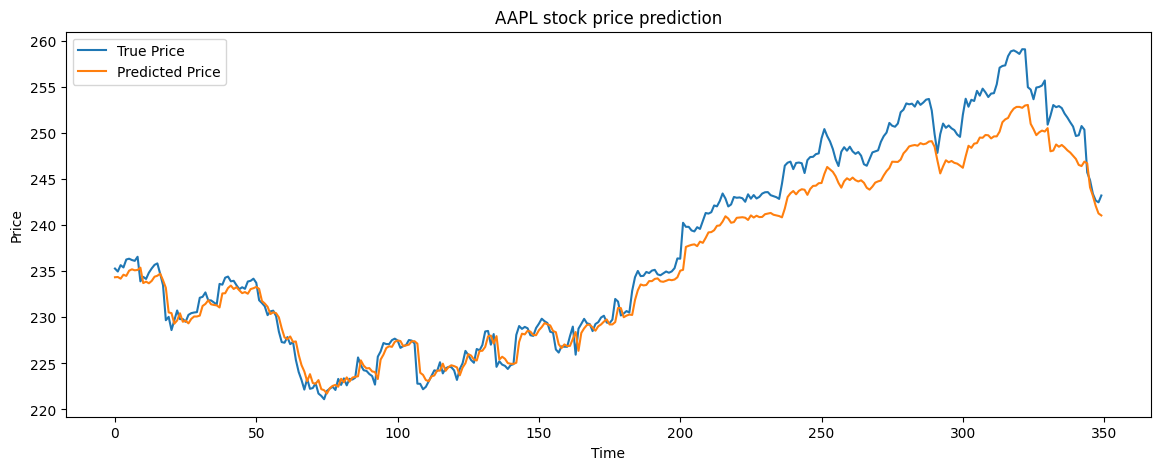

In [ ]:
df = yf.download(stock_name, period="2y", interval="1h")
df_close = df["Close"]
## generate data by window with target 
def window_data(data, window_size):
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
        
    return np.array(X), np.array(y).reshape(-1, 1)

df_windowed, df_target = window_data(df_close.to_numpy(), 6)
scaler = MinMaxScaler()
# Reshape df_windowed to 2D
df_windowed_reshaped = df_windowed.reshape(df_windowed.shape[0], -1)
x_scaler = scaler.fit(df_windowed_reshaped)
df_windowed_reshaped = x_scaler.transform(df_windowed_reshaped)
# Reshape back to 3D
df_windowed = df_windowed_reshaped.reshape(df_windowed.shape[0], df_windowed.shape[1], df_windowed.shape[2])
y_scaler = scaler.fit(df_target)
df_target = y_scaler.transform(df_target)

train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]

model_lstm = Sequential([
    LSTM(units=128, 
            return_sequences=True, 
            input_shape=(X_train.shape[1], X_train.shape[2])),
    # BatchNormalization(),
    Dropout(0.2),
    
    LSTM(units=64),
    # BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dense(1)
])
optimizer = Adam(learning_rate=0.01)
model_lstm.compile(optimizer=optimizer, loss='mean_squared_error')
model_lstm.summary()

history=model_lstm.fit(X_train, y_train, epochs=100, batch_size=32,    
    validation_split=0.1,
    verbose=1)
Y_pred = model_lstm.predict(X_test)
Y_pred = y_scaler.inverse_transform(Y_pred)
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Price')
plt.plot(Y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()





In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

df = yf.download(stock_name, period="2y",interval='1h')
# print(df)
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df.columns = cols
def window_data_multivariate(data, window_size):
    """
    Generate windowed data using multiple features to predict closing price
    
    Parameters:
    data (numpy array): Input data of shape (n_samples, n_features)
    window_size (int): Number of time steps to look back
    
    Returns:
    X (numpy array): Input windows of shape (n_samples, window_size, n_features)
    y (numpy array): Target closing prices of shape (n_samples, 1)
    """
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        # Window includes all features
        X.append(data[i:(i + window_size), :])
        # Target is next day's closing price
        y.append(data[i + window_size, 0])  # Closing price is first column
        
    return np.array(X), np.array(y).reshape(-1, 1)

# Prepare feature DataFrame - adjust these columns based on your available data
df_features = df[['Close', 'High', 'Low', 'Volume']].copy()

# Scale all features
scaler_features = MinMaxScaler()
df_scaled = scaler_features.fit_transform(df_features)

# Create separate scaler for closing price (target)
scaler_target = MinMaxScaler()
scaler_target.fit(df_features['Close'].values.reshape(-1, 1))

# Generate windowed data
df_windowed, df_target = window_data_multivariate(df_scaled, window_size=6)
# print(df_windowed)

# Split into train and test sets
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]

# Create and compile the model
model_lstm_multi = Sequential([
    LSTM(units=128, 
            return_sequences=True, 
            input_shape=(X_train.shape[1], X_train.shape[2])),
    # BatchNormalization(),
    Dropout(0.2),
    
    LSTM(units=64),
    # BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    # BatchNormalization(),
    Dropout(0.2),
    Dense(1)
])

optimizer = Adam(learning_rate=0.01)
model_lstm_multi.compile(optimizer=optimizer, loss='mean_squared_error')
model_lstm_multi.summary()

# Train the model
history = model_lstm_multi.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1,
    verbose=1
)

# Make predictions
X_pred = model_lstm_multi.predict(X_test)

# Inverse transform predictions and actual values
# We can directly use scaler_target since we're only dealing with closing prices
y_pred = scaler_target.inverse_transform(X_pred)
y_test_transformed = scaler_target.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test_transformed, label='True Price')
plt.plot(y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


ValueError: Length mismatch: Expected axis has 5 elements, new values have 6 elements

[*********************100%***********************]  1 of 1 completed
c:\Users\Acer\Desktop\projects\autoTrade\test\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 6, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,969 (171.75 KB)

 Trainable params: 43,969 (171.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0381 - val_loss: 4.6003e-04
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 4.0561e-04
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5982e-04 - val_loss: 0.0016
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6546e-04 - val_loss: 1.9485e-04
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8109e-04 - val_loss: 0.0013
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2572e-04 - val_loss: 1.9620e-04
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0310e-04 - val_loss: 4.2470e-04
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9983e-04 - val_loss: 1.9124e-04
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8097e-04 - val_loss: 1.8117e-04
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4053e-04 - val_loss: 2.8823e-04
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5627e-04 - val_loss: 4.

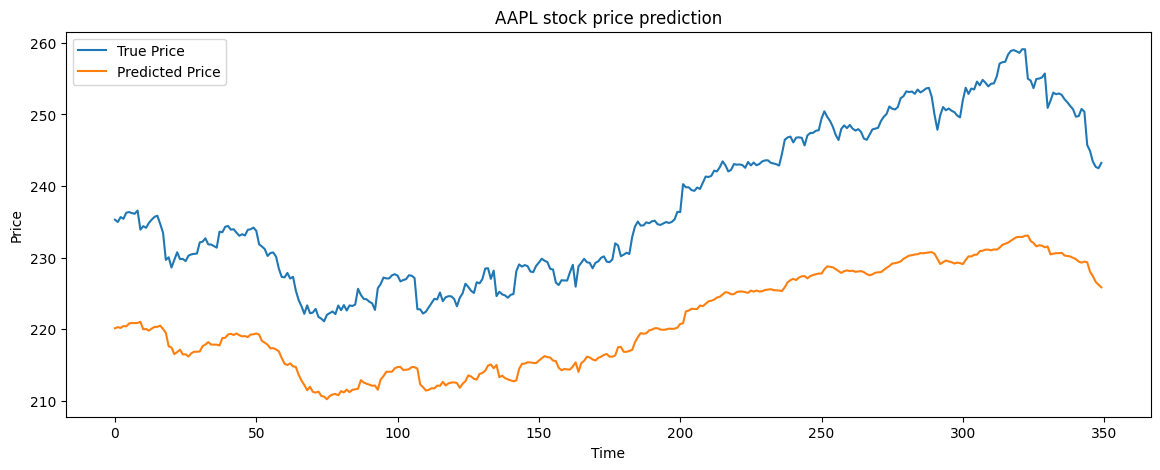

In [7]:
df = yf.download(stock_name, period="2y", interval="1h")
df_close = df["Close"]
## generate data by window with target 
def window_data(data, window_size):
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
        
    return np.array(X), np.array(y).reshape(-1, 1)

df_windowed, df_target = window_data(df_close.to_numpy(), 6)
scaler = MinMaxScaler()
# Reshape df_windowed to 2D
df_windowed_reshaped = df_windowed.reshape(df_windowed.shape[0], -1)
x_scaler = scaler.fit(df_windowed_reshaped)
df_windowed_reshaped = x_scaler.transform(df_windowed_reshaped)
# Reshape back to 3D
df_windowed = df_windowed_reshaped.reshape(df_windowed.shape[0], df_windowed.shape[1], df_windowed.shape[2])
y_scaler = scaler.fit(df_target)
df_target = y_scaler.transform(df_target)
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]

model_rnn = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    GRU(64, activation='tanh', return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.01)
model_rnn.compile(optimizer=optimizer, loss='mean_squared_error')
model_rnn.summary()

history=model_rnn.fit(X_train, y_train, epochs=100, batch_size=32,    
    validation_split=0.1,
    verbose=1)
Y_pred = model_rnn.predict(X_test)
Y_pred = y_scaler.inverse_transform(Y_pred)
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Price')
plt.plot(Y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



